In [32]:
from keras.datasets.mnist import load_data

from keras.utils import to_categorical
import tensorflow as tf

tf.config.run_functions_eagerly(True) # Do uruchamiania m.in. to_categorical

from tensorflow.keras import layers, models

import numpy as np

import matplotlib.pyplot as plt

# Zaimportowanie danych

In [6]:
(trainX,trainY), (testX, testY) = load_data()

In [11]:
to_categorical(trainY, num_classes=10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
trainX.shape

(60000, 28, 28)

# Budowanie modelu

In [28]:
# https://blog.keras.io/building-autoencoders-in-keras.html
import keras

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input = layers.Input(shape = (28*28,)) # Dlaczego 28*28? Ponieważ autoenkoder (z wyrazen algebraicznych) nie zachowuje własności przestrzennych i "rozpłaszcza" wymiary - z siatki 28x28 robi sie jeden ciąg 28*28 wymiarów 
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(28*28, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = models.Model(input, decoded)

# Oddzielny enkoder
# This model maps an input to its encoded representation
encoder = models.Model(input, encoded)

# Oddzielny dekoder
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = models.Model(encoded_input, decoder_layer(encoded_input))

In [29]:
#  configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
# dane
x_train = trainX.astype('float32') / 255.
x_test = testX.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [31]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50


c:\Users\barlewandowski\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


235/235 [==============================] - 13s 53ms/step - loss: 0.2789 - val_loss: 0.1936
Epoch 2/50
235/235 [==============================] - 12s 52ms/step - loss: 0.1730 - val_loss: 0.1545
Epoch 3/50
235/235 [==============================] - 13s 53ms/step - loss: 0.1445 - val_loss: 0.1335
Epoch 4/50
235/235 [==============================] - 14s 62ms/step - loss: 0.1282 - val_loss: 0.1210
Epoch 5/50
235/235 [==============================] - 13s 56ms/step - loss: 0.1181 - val_loss: 0.1129
Epoch 6/50
235/235 [==============================] - 12s 52ms/step - loss: 0.1112 - val_loss: 0.1071
Epoch 7/50
235/235 [==============================] - 12s 53ms/step - loss: 0.1062 - val_loss: 0.1028
Epoch 8/50
235/235 [==============================] - 14s 60ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 13s 57ms/step - loss: 0.0997 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 12s 50ms/step - loss: 0.0977 - val_los

# Wizualizacja

In [34]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

 15/313 [>.............................] - ETA: 1s 

c:\Users\barlewandowski\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step


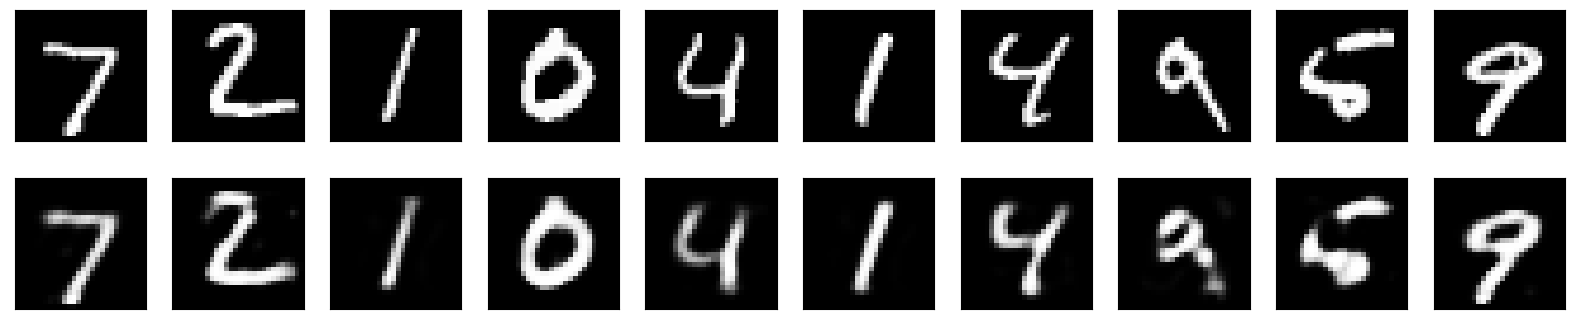

In [35]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()